# NLP Topic Classification and Clustering Demo

This demo uses the 20 Newsgroups dataset to demonstrate:

• TF-IDF classification  
• SentenceTransformer embedding classification  
• Topic clustering and hierarchical topic tree generation  

Dataset size: 10,000 documents across 20 topics

In [ ]:
import sys

sys.path.append("..")

from src.data_loader import load_raw_dataset, subsample_dataset

import pandas as pd
from IPython.display import Image, display

## Dataset Overview

We load the 20 Newsgroups dataset and subsample to 10,000 documents.

In [15]:
texts, labels, label_names = load_raw_dataset()

texts, labels = subsample_dataset(
    texts,
    labels,
    max_samples=10000
)

print("Dataset loaded")
print("Number of documents:", len(texts))
print("Number of classes:", len(label_names))

Dataset loaded
Number of documents: 10000
Number of classes: 20


## TF-IDF Classification Results

TF-IDF converts documents into sparse numerical features.

Linear SVM achieved the best classification performance.

TF-IDF Classification Results:



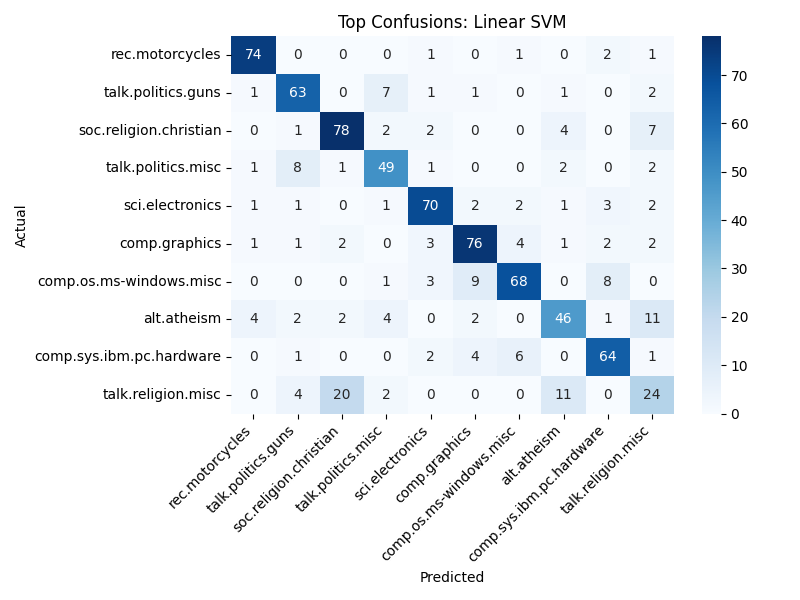

In [10]:
print("TF-IDF Classification Results:\n")

display(
    Image(
        "../outputs/bow/tfidf_confusion_matrix_compact_Linear_SVM.png",
        width=600
    )
)

## SentenceTransformer Embedding Classification

SentenceTransformer converts documents into dense semantic vectors.

These embeddings capture semantic meaning rather than word frequency.

SentenceTransformer Classification Results:



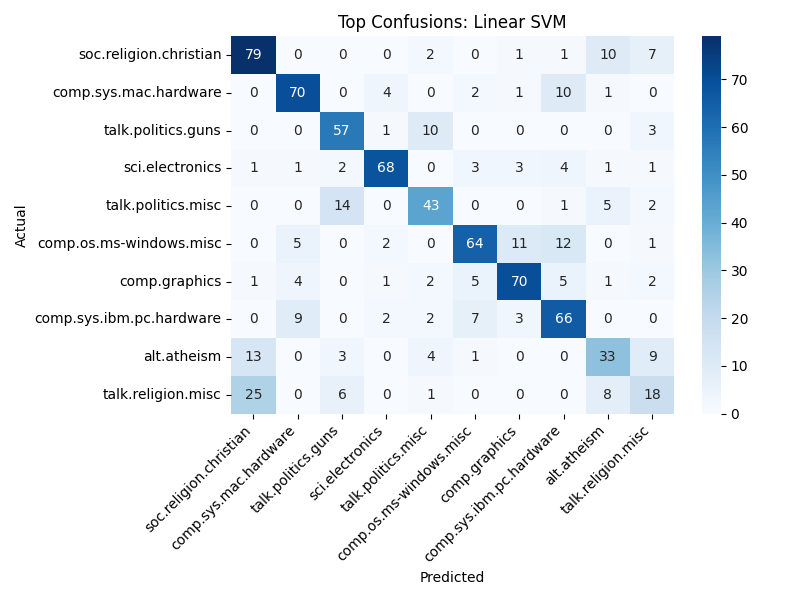

In [11]:
print("SentenceTransformer Classification Results:\n")

display(
    Image(
        "../outputs/embeddings/confusion_matrix_compact_Linear_SVM.png",
        width=600
    )
)

## Model Comparison

We compare classification accuracy and Macro-F1 scores across feature types.

In [12]:
comparison = pd.read_csv(
    "../outputs/comparisons/model_comparison.csv",
    index_col=0
)

comparison

,TF-IDF Accuracy,Embedding Accuracy,TF-IDF Macro-F1,Embedding Macro-F1
Naive Bayes,0.689,0.0315,0.662273,0.021501
Logistic Regression,0.707,0.6880,0.694783,0.676724
Linear SVM,0.717,0.6880,0.710372,0.675995
Random Forest,0.629,0.6590,0.615007,0.636706


## Elbow Method for Optimal Cluster Selection

We use the elbow method to determine the optimal number of topic clusters.

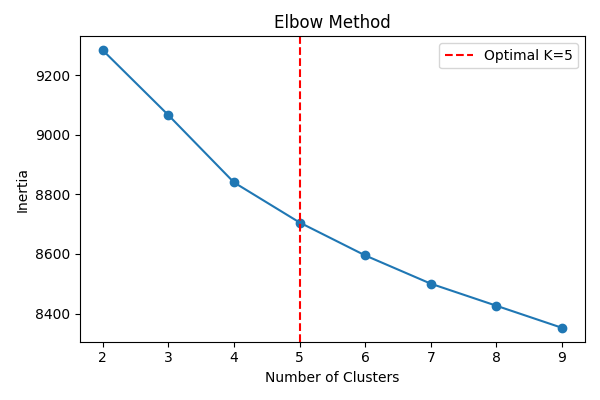

In [13]:
display(
    Image(
        "../outputs/clustering/elbow_plot.png",
        width=500
    )
)

## Topic Tree

We generate a hierarchical topic tree using clustering and LLM-based labeling.

Top-level clusters contain subtopic clusters.

In [14]:
with open("../outputs/clustering/topic_tree.txt") as f:
    print(f.read())

Cryptography and Privacy Concerns
  └── Car Reviews and Experiences
  └── Clipper Chip Controversy
  └── Lunar Exploration Conference

Vintage Computer Sales
  └── Hardware and Software Upgrades
  └── Computer Hardware and Software Sales
  └── Image Format Conversion




## Summary

• TF-IDF achieved the highest classification accuracy  
• SentenceTransformer embeddings enabled semantic clustering  
• Elbow method determined optimal cluster count  
• LLM-generated labels produced interpretable topic hierarchy  